# NAME-SOHIT PATHAK

# ROLL NO: MA22M019

2. a) How about multiple linear regression (from scratch) analysis? Can you predict the phone's rating based on its pixel density, screen size, weight, RAM, processor frequency, screen-to-body ratio, height, internal memory, capacity, and resolution using 80-20 train-test split ratio? (Using gradient descent approach). 
b) What is the MSE for this model? Also explore R-squared (R2) error.



3. a) Can you visualise the relationship between the phone's rating and each of its features using scatter plots (Individual scatter plot for each feature)?
b)  Which features have a strong linear relationship with the rating, and which features appear to have little or no impact on the rating?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\sohit\Downloads\mobile_data (1).csv")

In [3]:
df

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
336,465,220,5.00,141,1,1.2,67.20,142.7,16,2420,5,3.8
337,466,401,5.50,165,4,1.8,69.95,156.5,64,3000,13,3.9
338,468,282,5.20,160,3,1.4,68.52,149.7,16,3000,8,4.1
339,470,218,4.50,156,1,1.3,63.93,132.0,8,1800,2,3.6


In [4]:
df.isna().sum()

PhoneId                              0
Pixel Density                        0
Screen Size                          0
Weight                               0
RAM                                  0
Processor_frequency                  0
Screen to Body Ratio (calculated)    0
Height                               0
Internal Memory                      0
Capacity                             0
Resolution                           0
Rating                               0
dtype: int64

In [5]:
# normalize
x11 = df['Pixel Density']
x12 = df['Screen Size']
x13 = df['Weight']
x14 = df['RAM']
x15 = df['Processor_frequency']
x16 = df['Screen to Body Ratio (calculated)']
x17 = df['Height']
x18 = df['Internal Memory']
x19 = df['Capacity']
x20 = df['Resolution']
y = df['Rating']
x111 = (x11.max())
x121 = (x11.max())
x131 = (x11.max())
x141 = (x11.max())
x151 = (x11.max())
x161 = (x11.max())
x171 = (x11.max())
x181 = (x11.max())
x191 = (x11.max())
x201 = (x11.max())
x11 = x11/x111
x12 = x12/x121
x13 = x13/x131
x14 = x14/x141
x15 = x15/x151
x16 = x16/x161
x17 = x17/x171
x18 = x18/x181
x19 = x19/x191
x20 = x20/x201

y11 = y.max()
y= y/y11

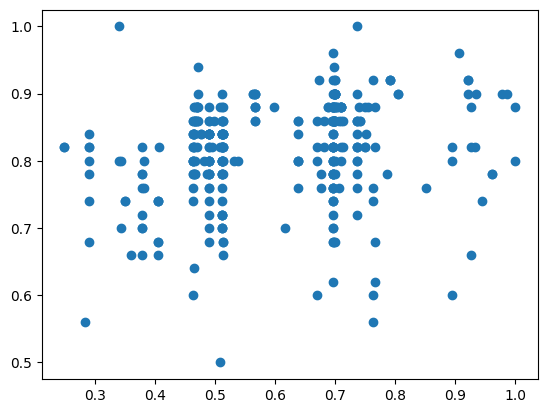

In [46]:
plt.scatter(x11,y) # scatter plot not good relation ship (litil impact)

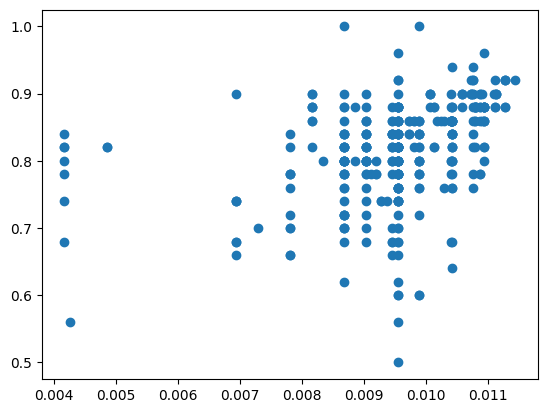

In [47]:
plt.scatter(x12,y) # somehow good relationship (much more impact)

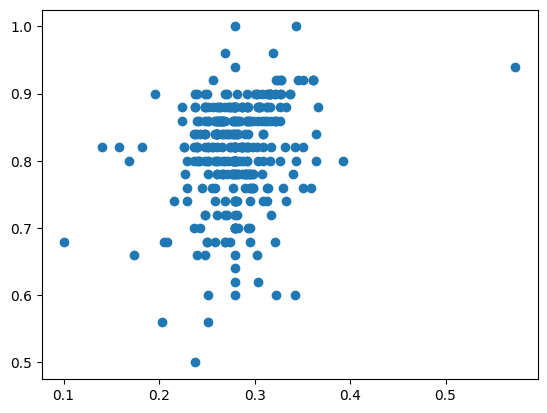

In [48]:
plt.scatter(x13,y) # not good relation ship (litil impact)

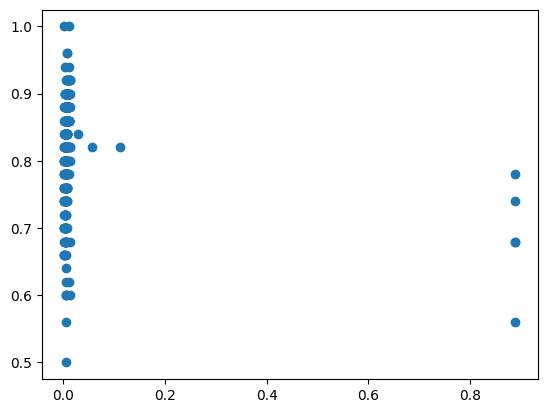

In [49]:
plt.scatter(x14,y) # bad relationship (no impact remove it from data frame)

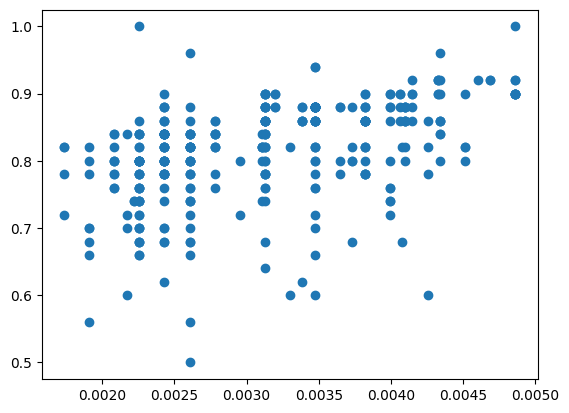

In [50]:
plt.scatter(x15,y) # comparitively to other good relationship (we want this)

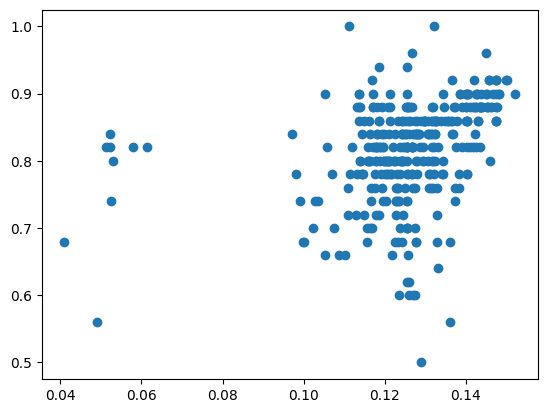

In [51]:
plt.scatter(x16,y)#somehow good relationship ( much more impact)

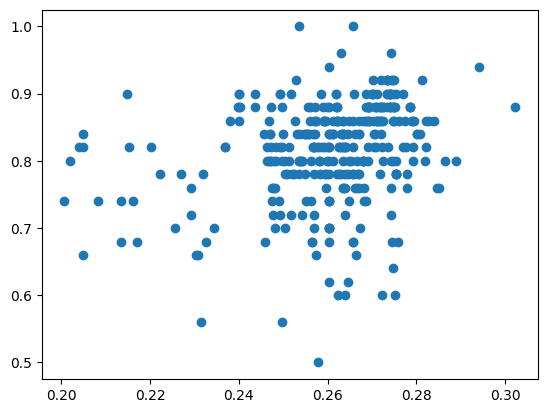

In [52]:
plt.scatter(x17,y) # good but not somehow good (too litil like no impact)

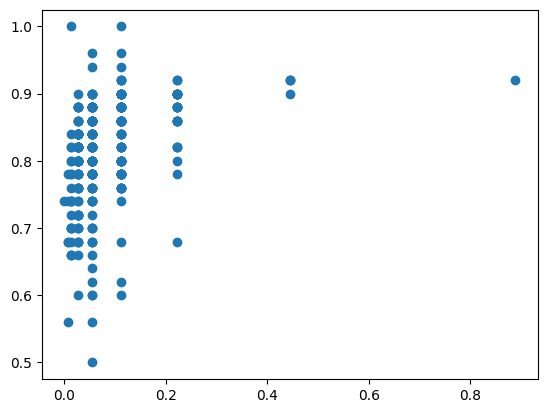

In [53]:
plt.scatter(x18,y) # somehow good relationship ( much more impact)

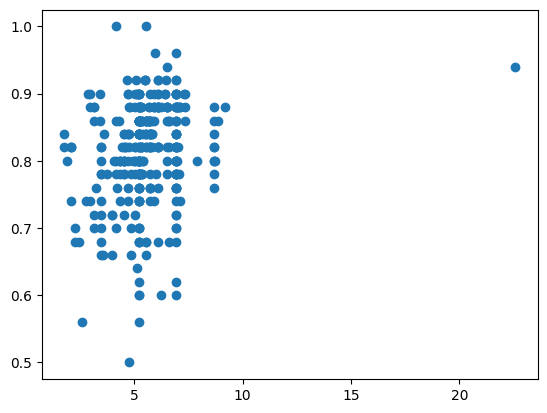

In [54]:
plt.scatter(x19,y) # not good relation ship  (too litil like no impact)

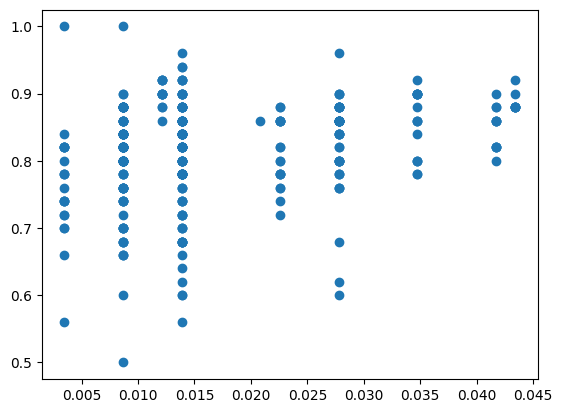

In [55]:
plt.scatter(x20,y) # somehow good relationship (litil more impact)

In [56]:
# relationship mathematically
a11 = x11.corr(y)
a12 = x12.corr(y)
a13 = x13.corr(y)
a14 = x14.corr(y)
a15 = x15.corr(y)
a16 = x16.corr(y)
a17 = x17.corr(y)
a18 = x18.corr(y)
a19 = x19.corr(y)
a20 = x20.corr(y)
print(a11,a12,a13,a14,a15,a16,a17,a18,a19,a20)


0.21611929572658667 0.3592426051554384 0.22905946491128 -0.19675272093447674 0.4485796410266035 0.34312556586283377 0.2669716078151373 0.35575708439972725 0.2106158213256251 0.25988389566629694


In [6]:
import random
random.seed(123)
X=random.sample([k for k in range(len(y))], int(len(y)*0.8))

In [7]:
X_features=[[1 for i in range(len(y))],x11,x12,x13,x14,x15,x16,x17,x18,x19,x20]
def J(w):    # Objective Function
    s=0
    for i in X:
        p=0
        for j in range(len(w)):
            p+=w[j]*X_features[j][i]
        s+=(p-y[i])**2
    return s/(2*len(X))
def gradJ(w):
    gr=[]
    for j in range(len(w)):
        s=0       
        for i in X:
            p=0
            for k in range(len(w)):
                p+=w[k]*X_features[k][i]
            s+=((p-y[i])*X_features[j][i])
        gr.append(s/len(X))
    return np.array(gr)

In [8]:
w_0=np.array([0 for i in range(11)])
print(J(w_0))
print(gradJ(w_0))

0.33881249999999996
[-8.19779412e-01 -4.96338210e-01 -7.82282731e-03 -2.28997779e-01
 -1.41572202e-02 -2.61045752e-03 -1.03734946e-01 -2.13694755e-01
 -7.10064338e-02 -4.53893114e+00 -1.38190615e-02]


In [9]:
#Here alpha is fixed
def SteepestDescent(f,gradf,initialGuess=np.array([0 for i in range(11)]),iterations=1000,tolerance=10**-5,StepL=0.001):
    k=0
    w_0=initialGuess
    while k<iterations and np.linalg.norm(gradf(w_0))>tolerance:
        p=-gradf(w_0)
        w_0=w_0+StepL*p

        k=k+1
    print('minimum value will be:',f(w_0),'at',w_0,'Number of iterations:',k)
    return w_0,f(w_0)
 

In [10]:
w_0,s=SteepestDescent(J,gradJ)
print('Weights are given by : ',w_0)
print('MSE: ',s)

minimum value will be: 0.01530538311089867 at [0.05965374 0.02934594 0.00045377 0.01353603 0.00377572 0.00018274
 0.00635039 0.01402975 0.00407101 0.12662193 0.00065144] Number of iterations: 1000
Weights are given by :  [0.05965374 0.02934594 0.00045377 0.01353603 0.00377572 0.00018274
 0.00635039 0.01402975 0.00407101 0.12662193 0.00065144]
MSE:  0.01530538311089867


In [38]:
def Predict(X_test,w_0):
    pred=[np.dot(w_0,X_test[i])*(df['Rating'].max()) for i in range(len(X_test))]
    return pred
    

In [39]:
X_test_samples=[i for i in range(len(y)) if i not in X]
X_test=[[X_features[i][j] for i in range(11)] for j in X_test_samples]

In [20]:
df['ones']=[1 for _ in range(len(df))]
Columns=['ones','Pixel Density','Screen Size','Weight','RAM','Processor_frequency','Screen to Body Ratio (calculated)',\
         'Height','Internal Memory','Capacity','Resolution']

In [22]:
X_test=[[df[column][j] for column in Columns] for j in X_test_samples]


In [23]:
X_test

[[1, 271, 6.2, 168, 3, 1.8, 80.85, 156.2, 32, 4230, 8],
 [1, 403, 6.18, 182, 6, 2.8, 82.2, 155.5, 64, 4000, 20],
 [1, 432, 5.84, 152, 3, 2.36, 79.07, 149.2, 32, 3000, 16],
 [1, 400, 6.3, 150, 4, 2.2, 84.87, 154.81, 64, 3260, 24],
 [1, 269, 5.99, 170, 4, 2.0, 74.64, 160.7, 64, 3080, 16],
 [1, 282, 5.7, 150, 3, 1.4, 75.36, 152.4, 32, 3000, 8],
 [1, 409, 6.3, 169, 4, 2.2, 82.03, 157.6, 128, 3340, 24],
 [1, 295, 5.45, 139, 1, 1.5, 74.53, 146.5, 16, 3000, 5],
 [1, 268, 6.0, 150, 3, 1.4, 78.62, 155.9, 16, 3360, 5],
 [1, 270, 6.22, 152, 4, 2.0, 82.33, 155.2, 64, 3260, 8],
 [1, 432, 5.84, 145, 4, 2.36, 80.06, 148.6, 64, 3000, 24],
 [1, 411, 6.0, 191, 6, 2.2, 75.82, 159.9, 64, 3500, 16],
 [1, 294, 5.6, 162, 4, 1.6, 75.33, 149.9, 32, 3000, 16],
 [1, 324, 6.1, 194, 3, 2.49, 79.79, 150.9, 64, 2942, 7],
 [1, 401, 5.5, 167, 3, 1.6, 73.13, 151.7, 16, 3300, 8],
 [1, 268, 6.0, 197, 3, 1.4, 76.68, 160.9, 32, 5000, 5],
 [1, 295, 5.45, 161, 2, 1.5, 73.05, 148.0, 16, 4000, 5],
 [1, 367, 6.0, 210, 4, 1.8, 7

In [40]:
Y_hat=Predict(X_test,w_0)

In [42]:
Y_hat

[5.061223712430368,
 4.844977759288932,
 3.74749783105514,
 4.027103205675468,
 3.7983422345999243,
 3.709189859064816,
 4.122005162598858,
 3.709795913160083,
 4.101341816201614,
 3.9940384967240155,
 3.747865681567473,
 4.2986586851414215,
 3.713428549947036,
 3.6624982957360857,
 4.070471867630719,
 5.910535670321961,
 4.811663529699136,
 5.937375571178322,
 3.930341207740014,
 4.842219121220742,
 3.9652623441334054,
 3.748742501739584,
 1.6945746305587919,
 4.625591379889825,
 4.854594839488092,
 2.940865088943428,
 3.741704922271646,
 3.290285674306683,
 4.836653481037253,
 3.0277675979705743,
 3.706891164577934,
 3.7829398629814186,
 14.755312892665982,
 3.600340036884953,
 4.842667158118824,
 2.275942533410941,
 3.7070356017687054,
 3.7088055739118513,
 2.5887686678876953,
 4.072581672455785,
 3.2689270206695036,
 2.304288976530283,
 4.532079584287035,
 3.7059667124146345,
 3.55907701967983,
 4.813511137598142,
 3.747712674557463,
 3.381684467157866,
 3.7481859338695473,
 3.7675

In [47]:
Y=[df["Rating"][i] for i in X_test_samples]

In [48]:
Predictions=pd.DataFrame({"Y":Y,'Y_hat':Y_hat})

In [49]:
Predictions

,Y,Y_hat
0,4.5,5.061224
1,4.5,4.844978
2,4.4,3.747498
3,4.4,4.027103
4,4.3,3.798342
...,...,...
64,4.5,4.329715
65,3.8,2.422683
66,3.6,2.611363
67,3.6,3.303425


In [50]:
error=np.dot(np.array(Y)-np.array(Y_hat),np.array(Y)-np.array(Y_hat))

In [51]:
error/len(X_test_samples)

2.2240503264643943

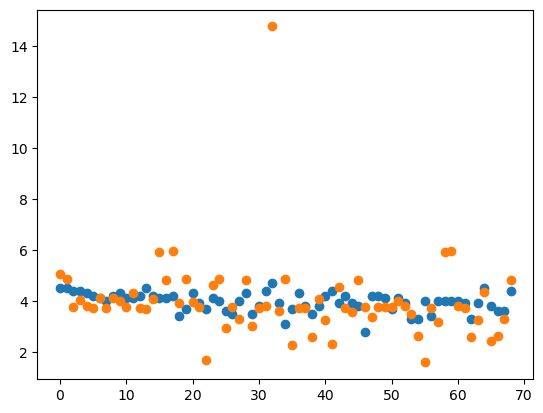

In [61]:
plt.scatter(Predictions.index,Predictions['Y'],label='Actuals')
plt.scatter(Predictions.index,Predictions['Y_hat'],label='Predicted')
plt.show()

In [57]:
print(*Predictions.index)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
